In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.manifold import TSNE

from functions import FC, dFC, v_dFC, dFC_stream, v_stream, dFC_matrix, pooled_v_stream, tSNE_evolution

In [2]:
#Fake data
df = pd.DataFrame({})
regions = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "L"]

for i in range(len(regions)):
  df.insert(i, column=regions[i], value=np.random.laplace(size=int(1e6)))

df

,A,B,C,D,E,F,G,H,I,L
0,0.079562,1.157995,-3.895067,0.065062,0.065521,-0.700269,1.854956,1.904189,0.204288,1.035566
1,1.068731,-0.593349,1.240332,1.215280,-2.669874,-2.258928,-1.651146,0.008723,0.965151,1.944547
2,-0.157496,-0.914903,2.347200,-1.596025,-3.491756,0.598713,-0.277361,1.085067,2.473358,0.541144
3,1.424690,0.579421,1.348059,0.339696,-3.837226,0.245572,0.851331,-2.640882,-0.535435,0.074287
4,0.358505,0.198144,-2.714470,-1.126631,0.626913,5.051744,5.253393,-0.150718,-0.027871,1.825458
...,...,...,...,...,...,...,...,...,...,...
999995,-0.046363,0.628737,-0.477668,-0.609325,1.122838,0.851372,-0.113929,0.148728,-2.027891,0.008077
999996,2.409143,0.121658,-1.333034,-0.294112,0.243843,0.118691,-2.846795,1.048235,0.786759,-0.019744
999997,-1.136450,-0.040713,-0.406385,0.491116,1.206579,-1.037798,1.385039,1.747938,-0.335565,-0.993563
999998,-0.122966,-0.519424,-2.396860,-1.956520,0.984543,0.789390,0.466692,-1.888499,-0.249429,-0.322405


<Axes: >

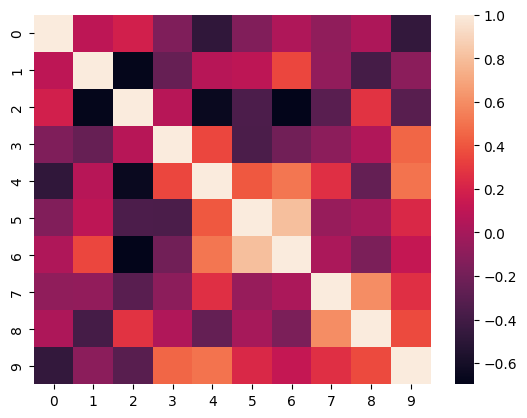

In [3]:
stream = dFC_stream(df, 10)

FC_0 = stream[0]
sn.heatmap(FC_0)

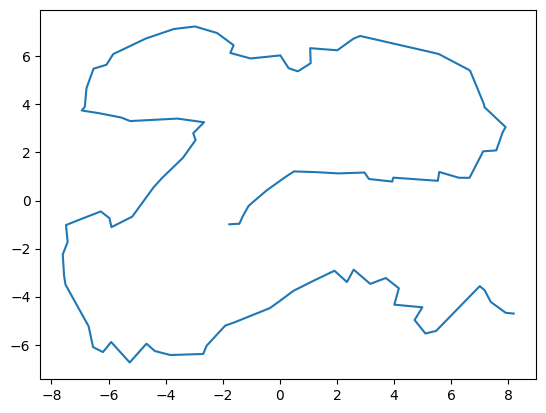

In [6]:
random_walk = tSNE_evolution(stream, TSNE)

plt.plot(random_walk[0], random_walk[1])

<Axes: >

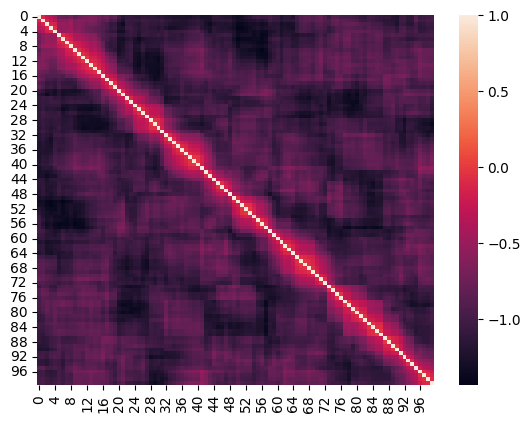

In [9]:
autocorrelation = dFC_matrix(stream)

sn.heatmap(autocorrelation)

(array([176., 257., 153.,  91.,  61.,  36.,  36.,  26.,  20.,  35.]),
 array([0.        , 0.11637931, 0.23275862, 0.34913793, 0.46551724,
        0.58189655, 0.69827586, 0.81465517, 0.93103448, 1.04741379,
        1.1637931 ]),
 <BarContainer object of 10 artists>)

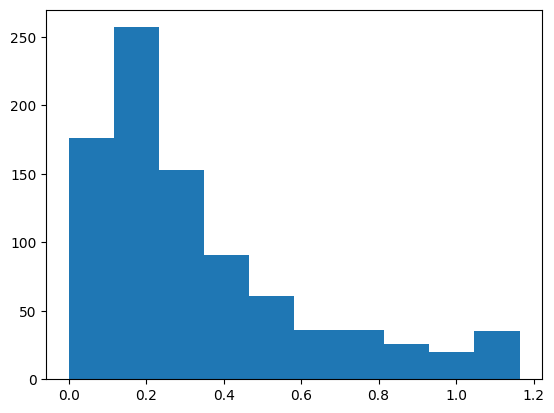

In [8]:
v_dist = pooled_v_stream(df, 5, 15)

plt.hist(v_dist)